In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def sparsity_val_extractor(file_name):
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
            if i == 2:
                spar12 = ast.literal_eval(line)
            if i == 3:
                spar23 = ast.literal_eval(line)
            if i == 4:
                spar34 = ast.literal_eval(line)
            if i == 5:
                spar45 = ast.literal_eval(line)
                
    for i, element in enumerate(sparsity_average):
        if not 0 <= element <= 1:
            sparsity_average[i] = 0
            
    for i, element in enumerate(spar12):
        if not 0 <= element <= 1:
            spar12[i] = 0

    for i, element in enumerate(spar23):
        if not 0 <= element <= 1:
            spar23[i] = 0

    for i, element in enumerate(spar34):
        if not 0 <= element <= 1:
            spar34[i] = 0

    for i, element in enumerate(spar45):
        if not 0 <= element <= 1:
            spar45[i] = 0
    
    return sparsity_average, spar12, spar23, spar34, spar45

In [3]:
def selectivity_val_extractor(file_name):
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
            if i == 3:
                selec_12_avg = ast.literal_eval(line)
            if i == 4:
                selec_12_std = ast.literal_eval(line)
            if i == 5:
                selec_23_avg = ast.literal_eval(line)
            if i == 6:
                selec_23_std = ast.literal_eval(line)
            if i == 7:
                selec_34_avg = ast.literal_eval(line)
            if i == 8:
                selec_34_std = ast.literal_eval(line)
            if i == 9:
                selec_45_avg = ast.literal_eval(line)
            if i == 10:
                selec_45_std = ast.literal_eval(line)
                
    for i, element in enumerate(selectivity_average):
        if not 0 <= element <= 1:
            selectivity_average[i] = 0
            
    for i, element in enumerate(selectivity_std):
        if not 0 <= element <= 1:
            selectivity_std[i] = 0
            
    for i, element in enumerate(selec_12_avg):
        if not 0 <= element <= 1:
            selec_12_avg[i] = 0
            
    for i, element in enumerate(selec_12_std):
        if not 0 <= element <= 1:
            selec_12_std[i] = 0
            
    for i, element in enumerate(selec_23_avg):
        if not 0 <= element <= 1:
            selec_23_avg[i] = 0
            
    for i, element in enumerate(selec_23_std):
        if not 0 <= element <= 1:
            selec_23_std[i] = 0
            
    for i, element in enumerate(selec_34_avg):
        if not 0 <= element <= 1:
            selec_34_avg[i] = 0
            
    for i, element in enumerate(selec_34_std):
        if not 0 <= element <= 1:
            selec_34_std[i] = 0
            
    for i, element in enumerate(selec_45_avg):
        if not 0 <= element <= 1:
            selec_45_avg[i] = 0
            
    for i, element in enumerate(selec_45_std):
        if not 0 <= element <= 1:
            selec_45_std[i] = 0
      
    return selectivity_average, selectivity_std, selec_12_avg, selec_12_std, selec_23_avg, selec_23_std, selec_34_avg, selec_34_std, selec_45_avg, selec_45_std

# Extract values

In [4]:
# sparsity
sparsity_average_sgd, spar12_sgd, spar23_sgd, spar34_sgd, spar45_sgd = sparsity_val_extractor('each_layer/4HL_sparsity_new_SGD.txt')
sparsity_average_adadelta, spar12_adadelta, spar23_adadelta, spar34_adadelta, spar45_adadelta = sparsity_val_extractor('each_layer/4HL_sparsity_new_Adadelta.txt')
sparsity_average_adagrad, spar12_adagrad, spar23_adagrad, spar34_adagrad, spar45_adagrad = sparsity_val_extractor('each_layer/4HL_sparsity_new_Adagrad.txt')
sparsity_average_adam, spar12_adam, spar23_adam, spar34_adam, spar45_adam = sparsity_val_extractor('each_layer/4HL_sparsity_new_Adam.txt')

# selectivity
selectivity_average_sgd, selectivity_std_sgd, selec_12_avg_sgd, selec_12_std_sgd, selec_23_avg_sgd, selec_23_std_sgd, selec_34_avg_sgd, selec_34_std_sgd, selec_45_avg_sgd, selec_45_std_sgd = selectivity_val_extractor('each_layer/4HL_selectivity_new_SGD.txt')
selectivity_average_adadelta, selectivity_std_adadelta, selec_12_avg_adadelta, selec_12_std_adadelta, selec_23_avg_adadelta, selec_23_std_adadelta, selec_34_avg_adadelta, selec_34_std_adadelta, selec_45_avg_adadelta, selec_45_std_adadelta = selectivity_val_extractor('each_layer/4HL_selectivity_new_Adadelta.txt')
selectivity_average_adagrad, selectivity_std_adagrad, selec_12_avg_adagrad, selec_12_std_adagrad, selec_23_avg_adagrad, selec_23_std_adagrad, selec_34_avg_adagrad, selec_34_std_adagrad, selec_45_avg_adagrad, selec_45_std_adagrad = selectivity_val_extractor('each_layer/4HL_selectivity_new_Adagrad.txt')
selectivity_average_adam, selectivity_std_adam, selec_12_avg_adam, selec_12_std_adam, selec_23_avg_adam, selec_23_std_adam, selec_34_avg_adam, selec_34_std_adam, selec_45_avg_adam, selec_45_std_adam = selectivity_val_extractor('each_layer/4HL_selectivity_new_Adam.txt')

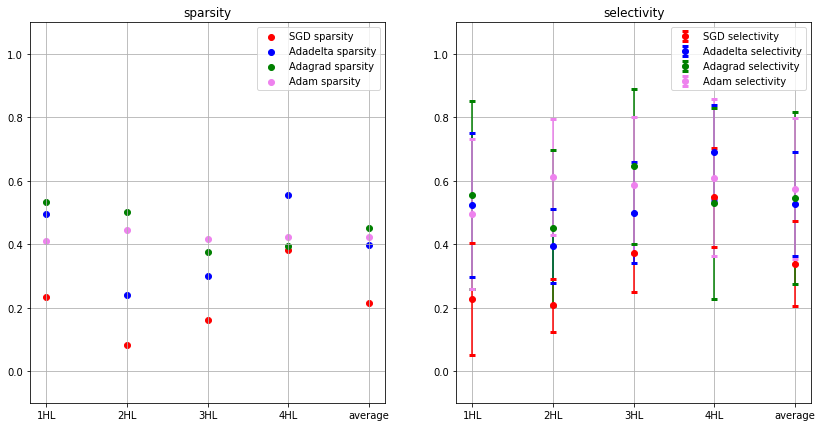

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# default setting for grpahs 
hl_ticks = ['1HL', '2HL', '3HL', '4HL', 'average']
ax1.set_xticks(np.linspace(1, 5, 5))
ax1.set_xticklabels(hl_ticks)

ax2.set_xticks(np.linspace(1, 5, 5))
ax2.set_xticklabels(hl_ticks)

# accuracy
ax1.scatter(np.linspace(1, 5, 5), [spar12_sgd[-1],      spar23_sgd[-1],      spar34_sgd[-1],      spar45_sgd[-1],      sparsity_average_sgd[-1]],      
            label='SGD sparsity', c='red')
ax1.scatter(np.linspace(1, 5, 5), [spar12_adadelta[-1], spar23_adadelta[-1], spar34_adadelta[-1], spar45_adadelta[-1], sparsity_average_adadelta[-1]], 
            label='Adadelta sparsity', c='blue')
ax1.scatter(np.linspace(1, 5, 5), [spar12_adagrad[-1],  spar23_adagrad[-1],  spar34_adagrad[-1],  spar45_adagrad[-1],  sparsity_average_adagrad[-1]],  
            label='Adagrad sparsity', c='green')
ax1.scatter(np.linspace(1, 5, 5), [spar12_adam[-1],     spar23_adam[-1],     spar34_adam[-1],     spar45_adam[-1],     sparsity_average_adam[-1]],     
            label='Adam sparsity', c='violet')

# selectivity
ax2.errorbar(np.linspace(1, 5, 5), 
             [selec_12_avg_sgd[-1], selec_23_avg_sgd[-1], selec_34_avg_sgd[-1], selec_45_avg_sgd[-1], selectivity_average_sgd[-1]],                          
             [selec_12_std_sgd[-1], selec_23_std_sgd[-1], selec_34_std_sgd[-1], selec_45_std_sgd[-1], selectivity_std_sgd[-1]], 
             capsize=3, capthick=3, fmt='o', label='SGD selectivity', c='red')

ax2.errorbar(np.linspace(1, 5, 5), 
             [selec_12_avg_adadelta[-1], selec_23_avg_adadelta[-1], selec_34_avg_adadelta[-1], selec_45_avg_adadelta[-1], selectivity_average_adadelta[-1]], 
             [selec_12_std_adadelta[-1], selec_23_std_adadelta[-1], selec_34_std_adadelta[-1], selec_45_std_adadelta[-1], selectivity_std_adadelta[-1]], 
             capsize=3, capthick=3, fmt='o', label='Adadelta selectivity', c='blue')

ax2.errorbar(np.linspace(1, 5, 5), 
             [selec_12_avg_adagrad[-1], selec_23_avg_adagrad[-1], selec_34_avg_adagrad[-1], selec_45_avg_adagrad[-1], selectivity_average_adagrad[-1]],      
             [selec_12_std_adagrad[-1], selec_23_std_adagrad[-1], selec_34_std_adagrad[-1], selec_45_std_adagrad[-1], selectivity_std_adagrad[-1]], 
             capsize=3, capthick=3, fmt='o', label='Adagrad selectivity', c='green')

ax2.errorbar(np.linspace(1, 5, 5), 
             [selec_12_avg_adam[-1], selec_23_avg_adam[-1], selec_34_avg_adam[-1], selec_45_avg_adam[-1], selectivity_average_adam[-1]],                     
             [selec_12_std_adam[-1], selec_23_std_adam[-1], selec_34_std_adam[-1], selec_45_std_adam[-1], selectivity_std_adam[-1]], 
             capsize=3, capthick=3, fmt='o', label='Adam selectivity', c='violet')

# setting legends
ax1.legend(loc='best')
ax2.legend(loc='best')

# setting titles 
ax1.set_title('sparsity')
ax2.set_title('selectivity')


# setting y_lim
ax1.set_ylim([-0.1,1.1]) 
ax2.set_ylim([-0.1,1.1])

ax1.grid()
ax2.grid()

plt.show()
